In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
#importing covid data which was in my pc
covid_data=pd.read_csv("C:/Users/BRUCE NYASH 31/Desktop/covid data/covid/covid_19_india.csv")

In [ ]:
covid_data.info()

In [ ]:
covid_data.describe()

In [ ]:
vaccine_data=pd.read_csv("C:/Users/BRUCE NYASH 31/Desktop/covid data/COVID-19  Vaccine Data.csv")

In [ ]:
vaccine_data.head()


In [ ]:
#drop unused columns
covid_data.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace=True, axis = 1 )

In [ ]:
covid_data.head(10)

In [ ]:
covid_data["Date"]= pd.to_datetime(covid_data["Date"])

In [ ]:
covid_data.head()

In [ ]:
covid_data.drop([3350])

In [46]:
#active cases
covid_data['Active_cases']= covid_data["Confirmed"]-(covid_data["Cured"]+covid_data["Deaths"])
covid_data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
3346,3347,22/06/20,8:00 AM,Tripura,-,-,782,1,1237,454
3347,3348,22/06/20,8:00 AM,Uttarakhand,-,-,1521,28,2402,853
3348,3349,22/06/20,8:00 AM,Uttar Pradesh,-,-,11601,569,18322,6152
3349,3350,22/06/20,8:00 AM,West Bengal,-,-,8687,569,14358,5102
3350,3351,22/06/20,8:00 AM,Cases being reassigned to states,-,-,0,0,8015,8015


In [47]:
#pivot table
statewise = pd.pivot_table(covid_data, values = ["Confirmed", "Deaths","Cured"],index = "State/UnionTerritory", aggfunc=max)

In [ ]:
#recovery rate in percentage
statewise["recovery rate"]=statewise["Cured"]*100/statewise["Confirmed"]

In [ ]:
#mortality rate in percentage
statewise["mortality rate"]=statewise["Deaths"]*100/statewise["Confirmed"]

In [ ]:
#sorting using the confirmed cases
statewise= statewise.sort_values(by = "Confirmed", ascending =False)

In [48]:
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,48,37,0
Andhra Pradesh,9372,4495,111
Arunachal Pradesh,139,21,0
Assam,5586,3521,9
Bihar,7825,5781,55
Cases being reassigned to states,9265,0,0
Chandigarh,411,322,6
Chhattisgarh,2303,1513,12
Dadar Nagar Haveli,26,2,0


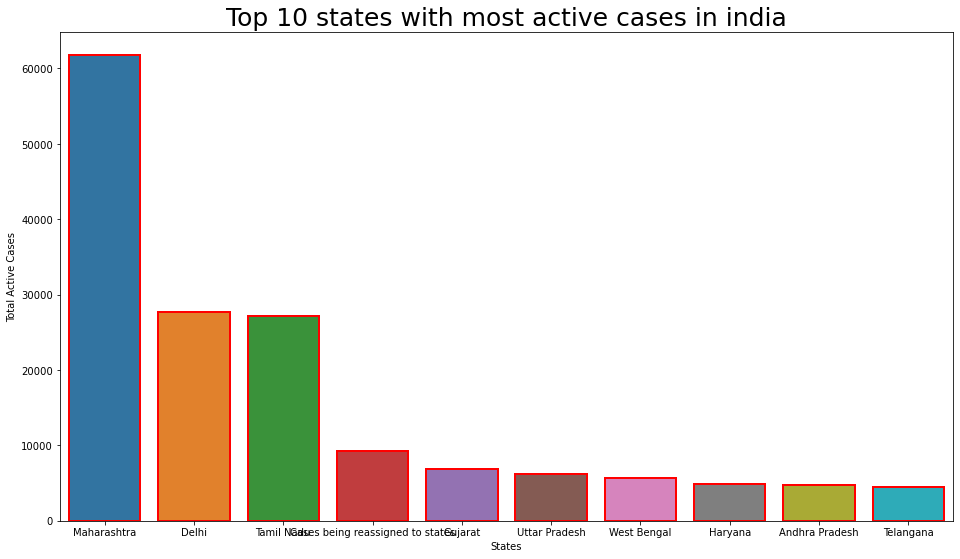

In [49]:
#top 10 acive cases state
top10_activeCases= covid_data.groupby(by = 'State/UnionTerritory').max()[['Active_cases','Date']].sort_values(by= ['Active_cases'], ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title('Top 10 states with most active cases in india',size =25)
ax = sns.barplot(data= top10_activeCases.iloc[:10],y='Active_cases', x= "State/UnionTerritory", linewidth = 2,edgecolor = 'red' )
plt.xlabel('States')
plt.ylabel('Total Active Cases')
plt.show()


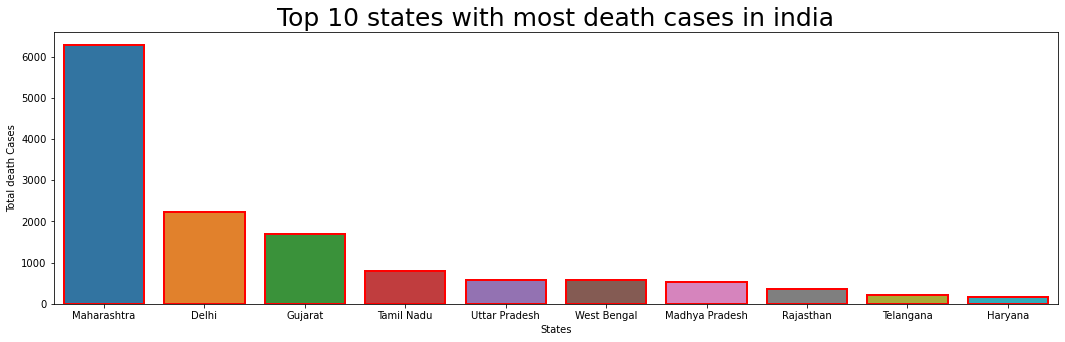

In [50]:
#top states with highest deaths
top10_activeCases= covid_data.groupby(by = 'State/UnionTerritory').max()[['Deaths','Date']].sort_values(by= ['Deaths'], ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title('Top 10 states with most death cases in india',size =25)
ax = sns.barplot(data= top10_activeCases.iloc[:10],y='Deaths', x= "State/UnionTerritory", linewidth = 2,edgecolor = 'red' )
plt.xlabel('States')
plt.ylabel('Total death Cases')
plt.show()


In [ ]:
#analysis of vaccine data
vaccine_data.head(10)

In [ ]:
vaccine_data.info()

In [ ]:
vaccine_data.isnull().sum()

In [ ]:
#dose 1 vs dose 2

dose1= vaccine_data['Dose 1'].sum()
dose2= vaccine_data['Dose 2'].sum()
px.pie(names=['dose1','dose2'], values=[dose1,dose2],title='Dose 1 and dose 2')

In [ ]:
vaccine_data.rename(columns={'Total Vaccination Doses': 'Total'}, inplace= True)
vaccine_data.head()

In [ ]:
#most vaccinated states
max_vaccination=vaccine_data.groupby('State/UTs')['Total'].sum().to_frame('Total')
max_vaccination=max_vaccination.sort_values('Total',ascending = False)[:5]
max_vaccination

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.title('Top 10 states with most vaccination in india',size =20)
x = sns.barplot(data= max_vaccination.iloc[:10],y=max_vaccination.Total, x= max_vaccination.index, linewidth = 2,edgecolor = 'red' )
plt.xlabel('States')
plt.ylabel('Vaccination')
plt.show()

In [ ]:
#least vaccinated states
min_vaccination=vaccine_data.groupby('State/UTs')['Total'].sum().to_frame('Total')

min_vaccination=min_vaccination.sort_values('Total',ascending = True).tail(5)
min_vaccination

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.title('Top 10 states with minimum vaccination',size =20)
x = sns.barplot(data= min_vaccination.iloc[:10],y=min_vaccination.Total, x= min_vaccination.index, linewidth = 2,edgecolor = 'red' )
plt.xlabel('States')
plt.ylabel('Vaccination')
plt.show()